# AI-based Tuberculosis Surveillance
### By Nqobile Hlatshwayo

## 1. Data Preprocessing

Columns in the CSV file:
Index(['Year', 'Quarter', 'Incidence_Rate', 'HIV (Search Term - All)',
       'TB causes + causes of TB (Search Term - Health)',
       'TB test (Search Term - Health)', 'TB (Search Term - Health)',
       'tuberculosis symptoms (Search Term - All)',
       'tb symptoms + tuberculosis symptoms (Search Term - All)',
       'HIV (Virus - Health)', 'HIV (Virus - All)', 'TB (Search Term - All)',
       'HIV (Search Term - Health)', 'TB test (Search Term - All)',
       'Diabetes (Search Term - All)', 'Mantoux test (Search Term - Health)',
       'TB causes + causes of TB (Search Term - All)',
       'tb symptoms + tuberculosis symptoms (Search Term - Health)',
       'Mantoux test (Diagnostic test - Health)',
       'Diabetes (Search Term - Health)', 'Tuberculosis (Disease - Health)',
       'Tuberculosis (Search Term - All)', 'tb symptoms (Search Term - All)',
       'Mantoux test (Diagnostic test - All)',
       'tuberculosis symptoms (Search Term - Health)',
   

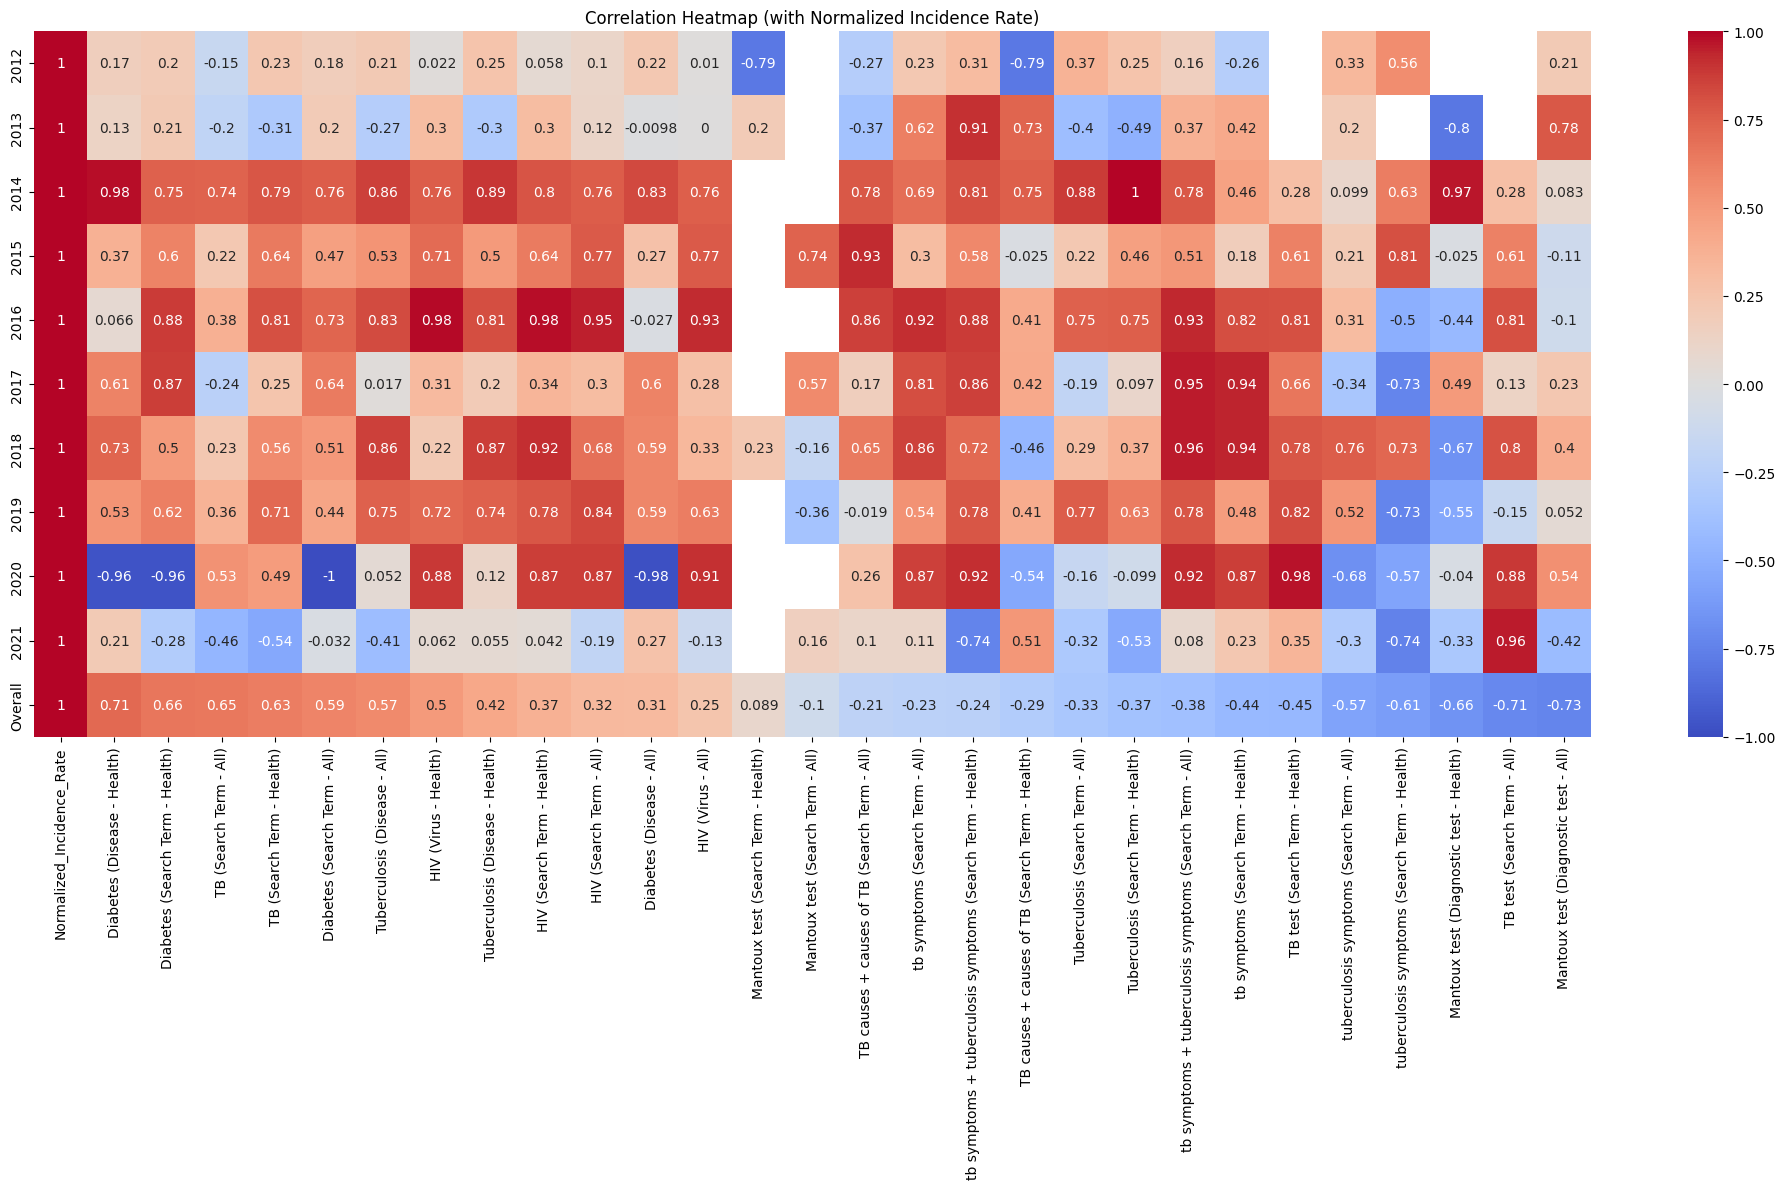

In [1]:

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file with comma separator
df = pd.read_csv('../data/merged_tb_data.csv', sep=',')

# Normalize the Incidence_Rate column
df['Normalized_Incidence_Rate'] = (df['Incidence_Rate'] - df['Incidence_Rate'].min()) / (df['Incidence_Rate'].max() - df['Incidence_Rate'].min()) * 100

# Print column names
print("Columns in the CSV file:")
print(df.columns)

def calculate_correlations(data, time_column, incidence_column):
    incidence_rate = data[incidence_column]
    correlations = {}

    # Calculate correlation for each search term
    for column in data.columns:
        if column not in [time_column, 'Quarter', incidence_column]:
            # Check if the column is constant
            if data[column].nunique() == 1:
                correlations[column] = np.nan
            else:
                corr, _ = stats.pearsonr(incidence_rate, data[column])
                correlations[column] = corr

    return correlations

# Set the correct columns
time_column = 'Year'
# incidence_column = 'Normalized_Incidence_Rate'
incidence_column = 'Incidence_Rate'

print(f"\nUsing '{time_column}' as the time column and '{incidence_column}' as the incidence rate column.")

# Get unique years from the data
years = df[time_column].unique()

# Create a dictionary to store correlations for each year
all_yearly_correlations = {}


# Calculate and print correlations for each year
for year in years:
    year_data = df[df[time_column] == year]
    # print(year_data.head()) 
    all_yearly_correlations[year] = calculate_correlations(year_data, time_column, incidence_column)
    
    # print(f"\n{year} Correlations:")
    # for term, corr in correlations.items():
    #     if np.isnan(corr):
    #         print(f"{incidence_column} vs {term}: Constant (correlation undefined)")
    #     else:
    #         print(f"{incidence_column} vs {term}: {corr:.3f}")

# Calculate and print overall correlations
print("\nOverall Correlations:")
all_yearly_correlations['Overall'] = calculate_correlations(df, time_column, incidence_column)
# for term, corr in overall_correlations.items():
#     if np.isnan(corr):
#         print(f"{incidence_column} vs {term}: Constant (correlation undefined)")
#     else:
#         print(f"{incidence_column} vs {term}: {corr:.3f}")

# Convert the dictionary to a DataFrame
correlation_df = pd.DataFrame(all_yearly_correlations).T

# Sort columns by overall correlation
overall_correlations = correlation_df.loc['Overall'].sort_values(ascending=False)
correlation_df = correlation_df[overall_correlations.index]

# Display the correlation table
print("Correlation Table:")
print(correlation_df)

# Create a heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap (with Normalized Incidence Rate)')
# plt.title('Correlation Heatmap (without Normalized Incidence Rate)')
plt.tight_layout()
plt.show()
# plt.savefig('correlation_heatmap1_normalized.png')
# print("Correlation heatmap saved to 'correlation_heatmap1.png'")
# print("Correlation heatmap saved to 'correlation_heatmap1_normalized.png'")


### Choosing only the features (search terms) with strong positive correlation in 5 of the 10 years.

In [2]:
import pandas as pd

# Assume 'correlation_df' is the DataFrame containing the correlation values for each year and search term

# Set the correlation threshold and minimum number of years
corr_threshold = 0.6
min_years = 5

# Count the number of years each search term exceeds the correlation threshold
strong_corr_counts = (correlation_df.iloc[:-1, :] > corr_threshold).sum(axis=0)

# Select the search terms that exceed the threshold for at least min_years
selected_terms = strong_corr_counts[strong_corr_counts >= min_years].index

print(f"Number of terms with strong correlations (>0.7) in at least {min_years} years: {len(selected_terms)}")
print(f"Search terms with strong correlations (>0.7) in at least {min_years} years:")
print(selected_terms.tolist())

# Filter the DataFrame to include only the selected search terms

data = df[['Year', 'Quarter', 'Incidence_Rate'] + selected_terms.tolist()]

# Create a datetime index
data['Date'] = pd.to_datetime(data['Year'].astype(str) + 'Q' + data['Quarter'].astype(str))
data.set_index('Date', inplace=True)
# print("Filtered DataFrame:")
# print(filtered_df.head())

Number of terms with strong correlations (>0.7) in at least 5 years: 11
Search terms with strong correlations (>0.7) in at least 5 years:
['Normalized_Incidence_Rate', 'Diabetes (Search Term - Health)', 'HIV (Virus - Health)', 'HIV (Search Term - Health)', 'HIV (Search Term - All)', 'HIV (Virus - All)', 'tb symptoms (Search Term - All)', 'tb symptoms + tuberculosis symptoms (Search Term - Health)', 'tb symptoms + tuberculosis symptoms (Search Term - All)', 'TB test (Search Term - Health)', 'TB test (Search Term - All)']


C:\Users\HP\AppData\Local\Temp\ipykernel_31972\1488179175.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Year'].astype(str) + 'Q' + data['Quarter'].astype(str))
C:\Users\HP\AppData\Local\Temp\ipykernel_31972\1488179175.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Year'].astype(str) + 'Q' + data['Quarter'].astype(str))


# Models

## 1. Partial Least Squares (PLS) 

In [3]:
import numpy as np
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming data is your DataFrame with dates as index, and 'Incidence_Rate' as target
# X contains Google Trends features, y is the TB incidence rate

def pls_model(window_size, data):
    # window_size - Number of quarters to use for training (4 years)
    
    # Sort data by date
    data = data.sort_index()

    # Define parameters
    
    horizon = 1  # Number of quarters to predict ahead
    n_components = 2  # Number of PLS components, can be optimized

    # Initialize arrays to store results
    predictions = []
    actual_values = []
    dates = []

    # Rolling window loop
    for i in range(window_size, len(data) - horizon + 1):
        # Define train and test sets for each window
        train = data.iloc[i-window_size:i]
        test = data.iloc[i:i+horizon]        

        # Separate features and target
        X_train = train.drop(['Year', 'Quarter', 'Incidence_Rate'], axis=1) # Drop the target, year and quarter from the features
        y_train = train['Incidence_Rate']
        X_test = test.drop(['Year', 'Quarter', 'Incidence_Rate'], axis=1) # Drop the target, year and quarter from the features
        y_test = test['Incidence_Rate']
        
        # Standardize features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train PLS model
        pls = PLSRegression(n_components=n_components)
        pls.fit(X_train_scaled, y_train)
        
        # Make prediction
        prediction = pls.predict(X_test_scaled)
        
        # Store results
        predictions.append(prediction[0])
        actual_values.append(y_test.values[0])
        dates.append(test.index[0])

    # Calculate performance metrics
    mse = mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual_values, predictions)
    r2 = r2_score(actual_values, predictions)

    # Print performance metrics
    print("PLS Model performance")
    print(f"Rolling Window MSE: {mse}")
    print(f"Rolling Window RMSE: {rmse}")
    print(f"Rolling Window MAE: {mae}")
    print(f"Rolling Window R-squared: {r2}")

    # Visualize results
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Incidence_Rate'], label='Actual', color='blue')
    plt.plot(dates, predictions, label='Predicted', color='red', linestyle='--')
    plt.title('TB Incidence Rate: Actual vs Rolling Window PLS Predictions')
    plt.xlabel('Date')
    plt.ylabel('Incidence Rate')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


PLS Model performance
Rolling Window MSE: 51.45002734938948
Rolling Window RMSE: 7.172867442619408
Rolling Window MAE: 5.704173466702748
Rolling Window R-squared: 0.8894178726151379


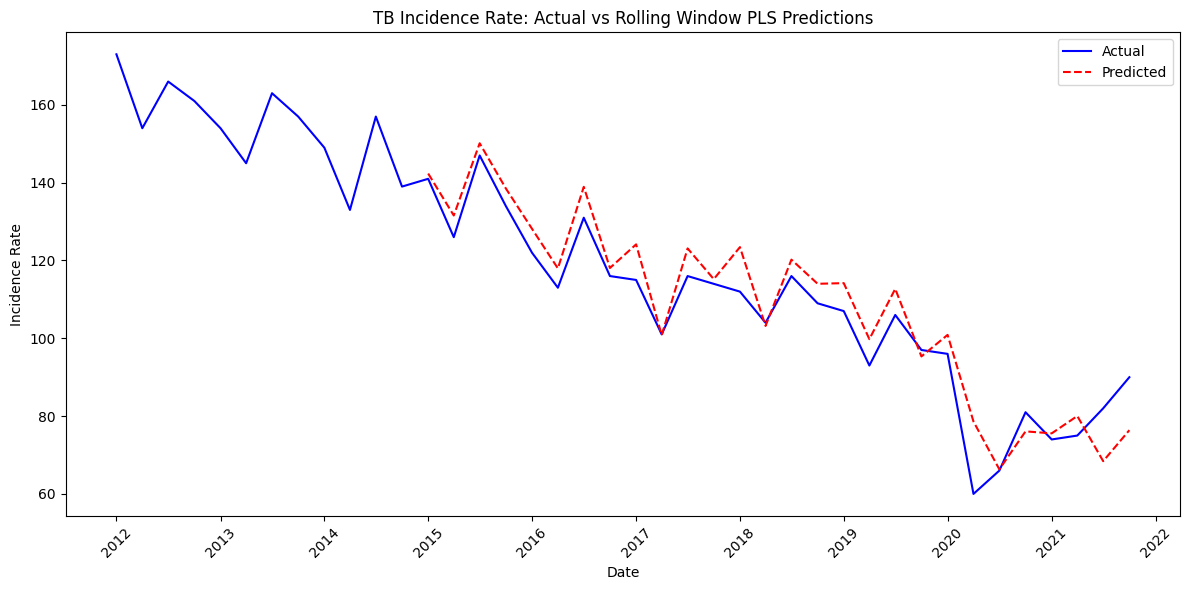

In [4]:
pls_model(12, data)

## 2. LASSO

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming data is your DataFrame with dates as index, and 'Incidence_Rate' as target
# X contains Google Trends features, y is the TB incidence rate

# Sort data by date
data = data.sort_index()

horizon = 1  # Number of quarters to predict ahead

def lasso(window_size, data):
    # Initialize arrays to store results
    predictions = []
    actual_values = []
    dates = []
    feature_importances = []

    # Rolling window loop
    for i in range(window_size, len(data) - horizon + 1):
        # Define train and test sets
        train = data.iloc[i-window_size:i]
        test = data.iloc[i:i+horizon]
        
        X_train = train.drop(['Incidence_Rate','Normalized_Incidence_Rate'], axis=1)
        y_train = train['Incidence_Rate']
        X_test = test.drop(['Incidence_Rate', 'Normalized_Incidence_Rate'], axis=1)
        y_test = test['Incidence_Rate']
        
        # Standardize features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train LASSO model with cross-validation
        lasso = LassoCV(cv=5, random_state=42, max_iter=10000)
        lasso.fit(X_train_scaled, y_train)
        
        # Make prediction
        prediction = lasso.predict(X_test_scaled)
        
        # Store results
        predictions.append(prediction[0])
        actual_values.append(y_test.values[0])
        dates.append(test.index[0])
        
        # Store feature importances
        feature_importances.append(lasso.coef_)

    # Convert lists to numpy arrays
    predictions = np.array(predictions)
    actual_values = np.array(actual_values)

    # Calculate performance metrics
    mse = mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual_values, predictions)
    r2 = r2_score(actual_values, predictions)

    # Print performance metrics
    print("LASSO Model performance")
    print(f"Rolling Window Performance Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

    # Visualize results
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Incidence_Rate'], label='Actual', color='blue')
    plt.plot(dates, predictions, label='Predicted', color='red', linestyle='--')
    plt.title('TB Incidence Rate: Actual vs Rolling Window LASSO Predictions')
    plt.xlabel('Date')
    plt.ylabel('Incidence Rate')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    
    # Inside your lasso function, replace the feature importance calculation with this:

    # Average feature importances
    avg_feature_importances = np.mean(feature_importances, axis=0)

    # Get feature names
    feature_names = data.columns.tolist()

    # Print diagnostic information
    print(f"Number of features: {len(feature_names)}")
    print(f"Length of avg_feature_importances: {len(avg_feature_importances)}")

    # Ensure feature_names and avg_feature_importances have the same length
    min_length = min(len(feature_names), len(avg_feature_importances))
    feature_names = feature_names[:min_length]
    avg_feature_importances = avg_feature_importances[:min_length]

    # Create a DataFrame with importances
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': np.abs(avg_feature_importances)
    })


c:\Users\HP\Documents\DO THE HONOURS\Research\Final Project\tb-surveillance-sa\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.815e-01, tolerance: 1.327e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\HP\Documents\DO THE HONOURS\Research\Final Project\tb-surveillance-sa\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.812e-01, tolerance: 1.327e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\HP\Documents\DO THE HONOURS\Research\Final Project\tb-surveillance-sa\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not conv

LASSO Model performance
Rolling Window Performance Metrics:
Mean Squared Error (MSE): 93.0292
Root Mean Squared Error (RMSE): 9.6452
Mean Absolute Error (MAE): 7.1229
R-squared (R2): 0.8001


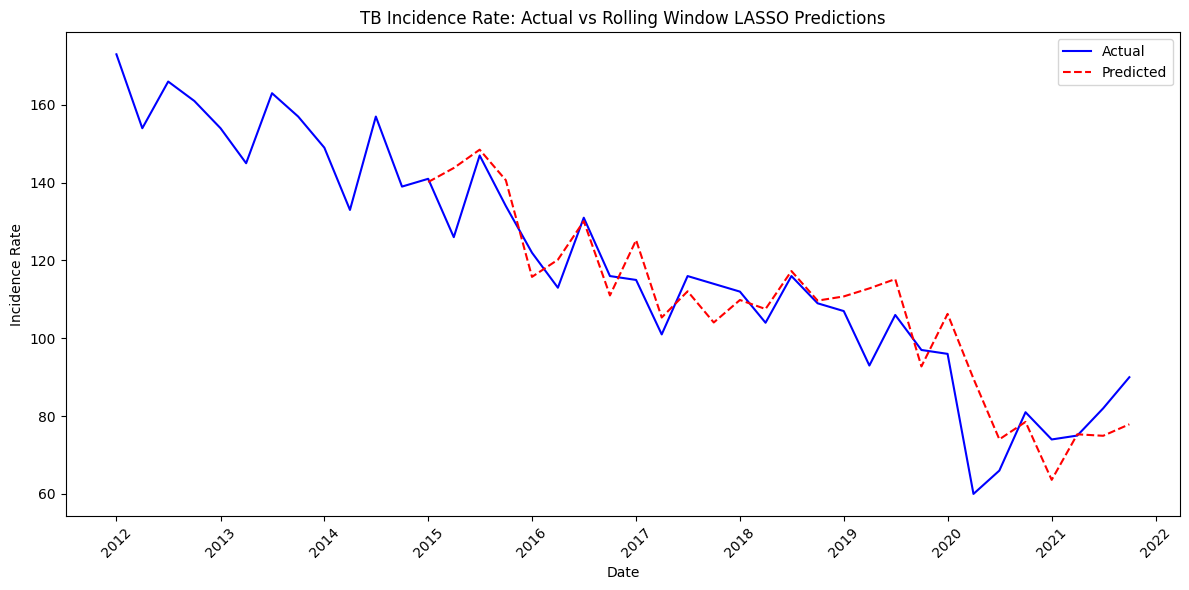

Number of features: 14
Length of avg_feature_importances: 12


In [6]:
lasso(12, data)

## 3. Support Vector Machine

In [7]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

def svm_model(window_size, data):
    """
    Implement SVM with rolling window approach for TB incidence prediction
    
    Parameters:
    window_size (int): Size of the rolling window in quarters
    data (DataFrame): Input data containing TB incidence and Google Trends features
    """
    # Sort data by date
    data = data.sort_index()
    
    # Initialize arrays to store results
    predictions = []
    actual_values = []
    dates = []
    
    # Define kernel parameters for testing
    param_grid = {
        'kernel': ['rbf', 'linear', 'poly'],
        'C': [0.1, 0.5, 1, 10, 20, 50, 70, 100],
        'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
        'epsilon': [0.1, 0.2, 0.5]
    }
    
    # Rolling window loop
    for i in range(window_size, len(data) - 1):
        # Define train and test sets
        train = data.iloc[i-window_size:i]
        test = data.iloc[i:i+1]
        
        X_train = train.drop(['Normalized_Incidence_Rate', 'Incidence_Rate'], axis=1) 
        y_train = train['Incidence_Rate']
        X_test = test.drop(['Normalized_Incidence_Rate', 'Incidence_Rate'], axis=1) 
        y_test = test['Incidence_Rate']
        
        # Standardize features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Initialize base SVM model
        svm = SVR()
        
        # Perform grid search with cross-validation
        grid_search = GridSearchCV(
            svm, 
            param_grid, 
            cv=5, 
            scoring='neg_mean_squared_error',
            n_jobs=-1
        )
        
        # Fit model
        grid_search.fit(X_train_scaled, y_train)
        
        # Get best parameters
        best_params = grid_search.best_params_
        
        # Train final model with best parameters
        best_model = SVR(**best_params)
        best_model.fit(X_train_scaled, y_train)
        
        # Make prediction
        prediction = best_model.predict(X_test_scaled)
        
        # Store results
        predictions.append(prediction[0])
        actual_values.append(y_test.values[0])
        dates.append(test.index[0])
        
        # Print best parameters for each window (optional)
        # print(f"Window ending {test.index[0]}: Best parameters: {best_params}")
    
    # Convert lists to numpy arrays
    predictions = np.array(predictions)
    actual_values = np.array(actual_values)
    
    # Calculate performance metrics
    mse = mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual_values, predictions)
    r2 = r2_score(actual_values, predictions)
    
    # Print performance metrics
    print("SVM Model performance")
    print(f"Rolling Window Performance Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2): {r2:.4f}")
    
    # Visualize results
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Incidence_Rate'], label='Actual', color='blue')
    plt.plot(dates, predictions, label='Predicted', color='red', linestyle='--')
    plt.title('TB Incidence Rate: Actual vs Rolling Window SVM Predictions')
    plt.xlabel('Date')
    plt.ylabel('Incidence Rate')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("Best Parameters:")
    print(best_params)
    

    return predictions, actual_values, dates, best_params

SVM Model performance
Rolling Window Performance Metrics:
Mean Squared Error (MSE): 144.1934
Root Mean Squared Error (RMSE): 12.0081
Mean Absolute Error (MAE): 9.1743
R-squared (R2): 0.6956


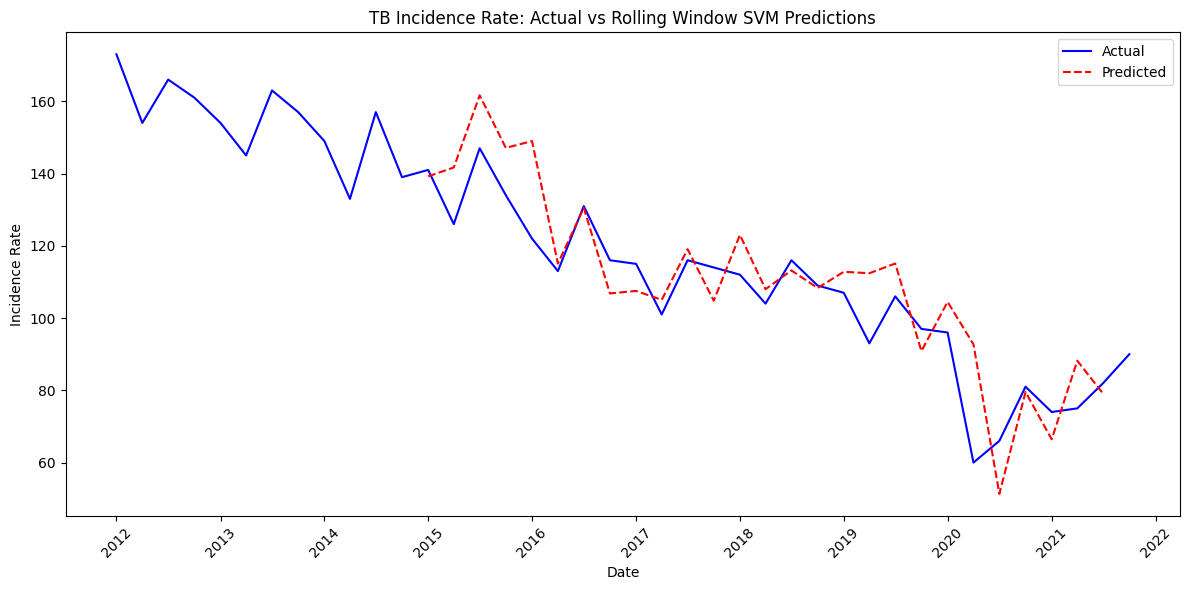

Best Parameters:
{'C': 100, 'epsilon': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}


(array([139.21493364, 141.68414409, 161.63516553, 147.09831939,
        148.98338018, 115.08053965, 130.48581692, 106.81698121,
        107.51252277, 105.03565704, 119.06154564, 104.80426445,
        122.9975175 , 107.98606439, 113.18431801, 108.32304583,
        112.80450301, 112.4048936 , 115.10029894,  90.85851462,
        104.48165182,  92.70817813,  51.32434076,  79.54441366,
         66.44121149,  88.18200518,  79.02864201]),
 array([141, 126, 147, 134, 122, 113, 131, 116, 115, 101, 116, 114, 112,
        104, 116, 109, 107,  93, 106,  97,  96,  60,  66,  81,  74,  75,
         82]),
 [Timestamp('2015-01-01 00:00:00'),
  Timestamp('2015-04-01 00:00:00'),
  Timestamp('2015-07-01 00:00:00'),
  Timestamp('2015-10-01 00:00:00'),
  Timestamp('2016-01-01 00:00:00'),
  Timestamp('2016-04-01 00:00:00'),
  Timestamp('2016-07-01 00:00:00'),
  Timestamp('2016-10-01 00:00:00'),
  Timestamp('2017-01-01 00:00:00'),
  Timestamp('2017-04-01 00:00:00'),
  Timestamp('2017-07-01 00:00:00'),
  Times

In [8]:
svm_model(12, data)

## 4. Long Short Term Memory

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def create_sequences(X, y, time_steps):
    """
    Create sequences for LSTM input
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

def lstm_model(window_size, data):
    """
    Implement LSTM with rolling window approach for TB incidence prediction
    
    Parameters:
    window_size (int): Size of the rolling window in quarters
    data (DataFrame): Input data containing TB incidence and Google Trends features
    """
    # Sort data by date
    data = data.sort_index()
    
    # Initialize arrays to store results
    predictions = []
    actual_values = []
    dates = []
    
    # Model hyperparameters
    sequence_length = 4  # Number of time steps to look back
    lstm_units = 64     # Number of LSTM units
    dropout_rate = 0.2  # Dropout rate
    learning_rate = 0.01  # Learning rate for Adam optimizer
    epochs = 100        # Number of training epochs
    batch_size = 32     # Batch size for training
    
    # Rolling window loop
    for i in range(window_size, len(data) - 1):
        # Define train and test sets
        train = data.iloc[i-window_size:i]
        test = data.iloc[i:i+1]
        
        X_train = train.drop('Incidence_Rate', axis=1)
        y_train = train['Incidence_Rate']
        X_test = test.drop('Incidence_Rate', axis=1)
        y_test = test['Incidence_Rate']
        
        # Scale the data
        scaler_X = MinMaxScaler()
        scaler_y = MinMaxScaler()
        
        X_train_scaled = scaler_X.fit_transform(X_train)
        X_test_scaled = scaler_X.transform(X_test)
        
        y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
        
        # Create sequences
        X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, sequence_length)
        
        # Build LSTM model
        model = Sequential([
            LSTM(units=lstm_units, 
                 return_sequences=True, 
                 input_shape=(sequence_length, X_train.shape[1])),
            Dropout(dropout_rate),
            LSTM(units=lstm_units//2),
            Dropout(dropout_rate),
            Dense(1)
        ])
        
        # Compile model
        optimizer = Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss='mse')
        
        # Train model
        model.fit(X_train_seq, y_train_seq, 
                 epochs=epochs, 
                 batch_size=batch_size, 
                 verbose=0)
        
        # Prepare test data sequence
        X_test_seq = X_train_scaled[-sequence_length:].reshape(1, sequence_length, X_train.shape[1])
        
        # Make prediction
        prediction_scaled = model.predict(X_test_seq, verbose=0)
        prediction = scaler_y.inverse_transform(prediction_scaled)[0][0]
        
        # Store results
        predictions.append(prediction)
        actual_values.append(y_test.values[0])
        dates.append(test.index[0])
    
    # Convert lists to numpy arrays
    predictions = np.array(predictions)
    actual_values = np.array(actual_values)
    
    # Calculate performance metrics
    mse = mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual_values, predictions)
    r2 = r2_score(actual_values, predictions)
    
    print("LSTM Model performance")
    print(f"\nRolling Window Performance Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2): {r2:.4f}")
    
    # Visualize results
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Incidence_Rate'], label='Actual', color='blue')
    plt.plot(dates, predictions, label='Predicted', color='red', linestyle='--')
    plt.title('TB Incidence Rate: Actual vs Rolling Window LSTM Predictions')
    plt.xlabel('Date')
    plt.ylabel('Incidence Rate')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    
    return predictions, actual_values, dates

c:\Users\HP\Documents\DO THE HONOURS\Research\Final Project\tb-surveillance-sa\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\Documents\DO THE HONOURS\Research\Final Project\tb-surveillance-sa\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\Documents\DO THE HONOURS\Research\Final Project\tb-surveillance-sa\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


c:\Users\HP\Documents\DO THE HONOURS\Research\Final Project\tb-surveillance-sa\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


c:\Users\HP\Documents\DO THE HONOURS\Research\Final Project\tb-surveillance-sa\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\Documents\DO THE HONOURS\Research\Final Project\tb-surveillance-sa\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\Documents\DO THE HONOURS\Research\Final Project\tb-surveillance-sa\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


LSTM Model performance

Rolling Window Performance Metrics:
Mean Squared Error (MSE): 193.3814
Root Mean Squared Error (RMSE): 13.9062
Mean Absolute Error (MAE): 11.6304
R-squared (R2): 0.5918


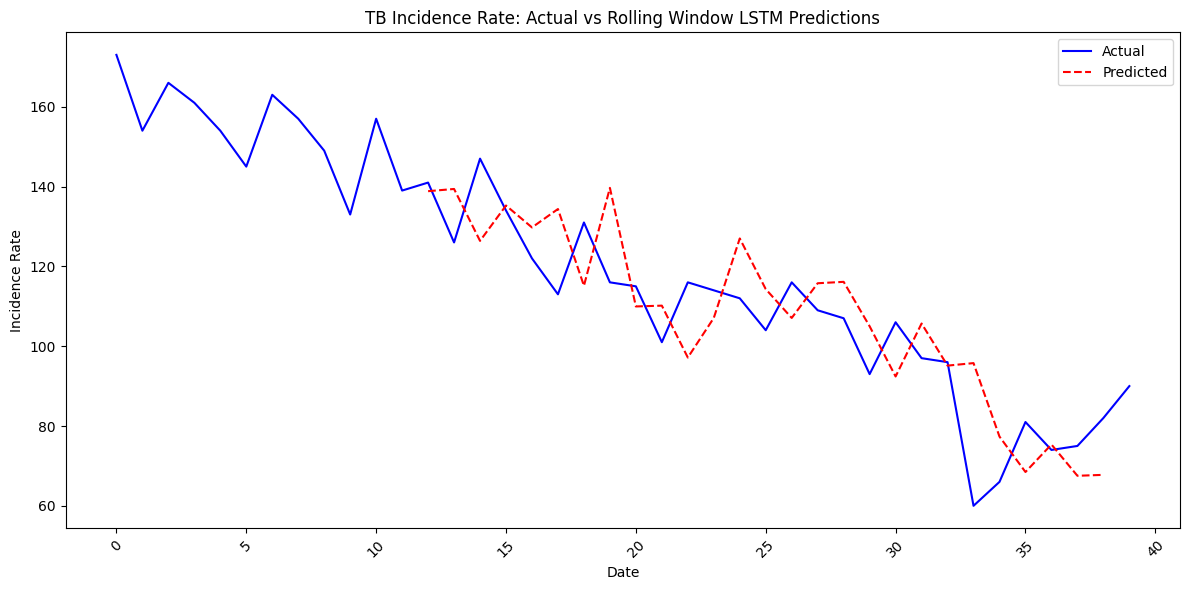

(array([138.84291 , 139.39867 , 126.39044 , 135.25476 , 129.75546 ,
        134.37387 , 115.136696, 139.67447 , 109.95806 , 110.161255,
         97.15416 , 107.08159 , 126.99682 , 114.2997  , 107.077774,
        115.77358 , 116.12454 , 104.9892  ,  92.40999 , 105.681114,
         95.13148 ,  95.758804,  77.34812 ,  68.47099 ,  75.36831 ,
         67.52422 ,  67.758804], dtype=float32),
 array([141, 126, 147, 134, 122, 113, 131, 116, 115, 101, 116, 114, 112,
        104, 116, 109, 107,  93, 106,  97,  96,  60,  66,  81,  74,  75,
         82]),
 [12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38])

In [10]:
lstm_model(12, df)